## Kaggle Competition - House Prices: Advanced Regression Techniques

In [1]:
# importing Python libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

/home/agavrilenko/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/agavrilenko/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/agavrilenko/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/agavrilenko/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
# importing the supplied dataset and storing it in a dataframe
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# making copies of original datasets for rest of this kernel
df_train = training.copy()
df_test = test.copy()

In [5]:
target = df_train['SalePrice']  #target variable
df_train = df_train.drop('SalePrice', axis=1) #drop target variable from training dataset
df_train['training_set'] = True #assing an extra variable to training and testing dataset before joining them
df_test['training_set'] = False
df_full = pd.concat([df_train, df_test]) #concatenate both dataframes prior to EDA

In [7]:
# clearly we can drop the 'Id' column which is redundant
df_full.drop('Id', axis=1, inplace=True)

In [12]:
len(df_full.columns) # number of columns (i.e. variables) in our training dataset

80

In [13]:
df_full.shape # we have 1459 observations of 80 variables in the training dataframe

(2919, 80)

In [15]:
# let's get some stats on the 'SalePrice' variable
minimum_price = np.min(target)
maximum_price = np.max(target)
mean_price = np.mean(target)
median_price = np.median(target)
std_price = np.std(target)

# Show the calculated statistics
print("Statistics for the supplied house prices training dataset:")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for the supplied house prices training dataset:
Minimum price: $34,900.00
Maximum price: $755,000.00
Mean price: $180,921.20
Median price $163,000.00
Standard deviation of prices: $79,415.29


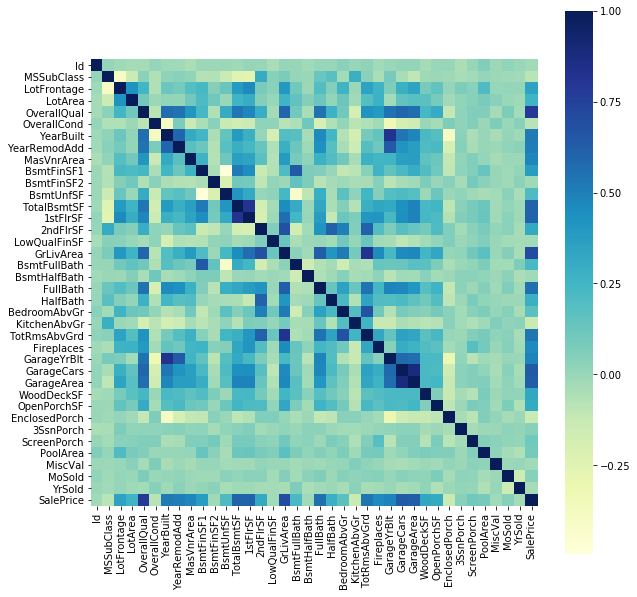

In [18]:
#Correlation map to see how features are correlated with SalePrice
corrmat = training.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,square=True, cmap="YlGnBu");

In [23]:
perc_na = (df_full.isnull().sum()/len(df_full))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :ratio_na})
#missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


In [24]:
# dropping variables with >15% missing values
df_full.drop('PoolQC', axis=1, inplace=True)
df_full.drop('MiscFeature', axis=1, inplace=True)
df_full.drop('Alley', axis=1, inplace=True)
df_full.drop('Fence', axis=1, inplace=True)
df_full.drop('FireplaceQu', axis=1, inplace=True)
df_full.drop('LotFrontage', axis=1, inplace=True)

In [27]:
# let's list all the numeric columns from df_training
numeric_variables = list(df_full.select_dtypes(include=['int64', 'float64']).columns.values)
# Apply per-column median of that columns and fill with that value
df_full[numeric_variables] = df_full[numeric_variables].apply(lambda x: x.fillna(x.median()),axis=0)

In [28]:
# let's list all the non-numerical columns from df_training
categorial_variables = list(df_full.select_dtypes(exclude=['int64', 'float64', 'bool']).columns.values)
# Apply per-column median of that columns and fill with that value
df_full[categorial_variables] = df_full[categorial_variables].apply(lambda x: x.fillna("None"),axis=0)

In [29]:
# let's check that we no longer have any missing values
perc_na = (df_full.isnull().sum()/len(df_full))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'missing_ratio' :ratio_na})
missing_data = missing_data.drop(missing_data[missing_data.missing_ratio == 0].index)
missing_data.head(5)

,missing_ratio


In [30]:
#convert categorical variable into dummy
df_full = pd.get_dummies(df_full)

In [31]:
df_full.shape

(2919, 287)

----
<a class="anchor" id="fifth-bullet"></a>
##  Prediction Model
###  Data Preparation

In [32]:
from sklearn.model_selection import train_test_split # import 'train_test_split'
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor
from sklearn.metrics import r2_score, make_scorer, mean_squared_error # import metrics from sklearn
from time import time

/home/agavrilenko/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/agavrilenko/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


> First, I need to separate my joined dataframe into training and testing dataframe. The 'training_set' I set up earlier will come in handy.

In [33]:
df_train = df_full[df_full['training_set']==True]
df_train = df_train.drop('training_set', axis=1)
df_test = df_full[df_full['training_set']==False]
df_test = df_test.drop('training_set', axis=1)

In [34]:
(df_train.shape, df_test.shape)

((1460, 286), (1459, 286))

> Shuffling and splitting the data into training and testing subsets. <br>
> This is a useful technique for implementation of cross-validation.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, random_state=42)

### 5.2 Random Forest Regressor

In [36]:
# number of trees in the forest n_estimators=100
# number of jobs to run in parallel is set to the number of cores (n_jobs=-1)
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1) 

In [37]:
# fit the model
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)

#### 5.2.2. Optimising Random Forest Regressor HyperParameters

In [38]:
from sklearn.model_selection import GridSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import ShuffleSplit # Random permutation cross-validator

> Cross-validation can be used (as shown below) to find optimum hyperparameters using RandomizedSearchCV.

In [39]:
start = time() # Get start time

rf_regressor = RandomForestRegressor(random_state=42)
cv_sets = ShuffleSplit(random_state = 4) # shuffling our data for cross-validation
parameters = {'n_estimators':[100, 120, 140], 
              'min_samples_leaf':[1, 2, 3], 
              'max_depth':[10,15,20]}
scorer = make_scorer(r2_score)
n_iter_search = 10
grid_obj = RandomizedSearchCV(rf_regressor, 
                              parameters, 
                              n_iter = n_iter_search, 
                              scoring = scorer, 
                              cv = cv_sets,
                              random_state= 99)
grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

end = time() # Get end time
# Calculate training time
rf_time = (end-start)/60
print('It took {0:.2f} minutes for RandomSearchCV to converge to optimised parameters for the RF model'.format(rf_time))

It took 3.73 minutes for RandomSearchCV to converge to optimised parameters for the RF model


In [40]:
# Get the estimator best parameters
grid_fit.best_params_

{'n_estimators': 120, 'min_samples_leaf': 1, 'max_depth': 15}

In [41]:
rf_opt_preds = rf_opt.predict(X_test) # RF predictions

#### 5.2.3. Feature Importance

> Let's get the RandomForestRegression model's assessment of the Top 5 most important features

In [42]:
importances = rf_opt.feature_importances_
X_train.columns.values[(np.argsort(importances)[::-1])[:5]] # the top 5 features

array(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'GarageArea'], dtype=object)

### 5.3. XGBoost

In [44]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(random_state=42)

In [ ]:
start = time() # Get start time
cv_sets_xgb = ShuffleSplit(random_state = 10) # shuffling our data for cross-validation
parameters_xgb = {'n_estimators':[7000,7500,8000], 
             'learning_rate':[0.05,0.060,0.070], 
             'max_depth':[3,5,7],
             'min_child_weight':[1,1.5,2]}
scorer_xgb = make_scorer(r2_score)
grid_obj_xgb = RandomizedSearchCV(xgb_regressor, 
                                 parameters_xgb,
                                 scoring = scorer_xgb, 
                                 cv = cv_sets_xgb,
                                 random_state= 99)
grid_fit_xgb = grid_obj_xgb.fit(X_train, y_train)
xgb_opt = grid_fit_xgb.best_estimator_

end = time() # Get end time
xgb_time = (end-start)/60 # Calculate training time
print('It took {0:.2f} minutes for RandomizedSearchCV to converge to optimised parameters for the XGBoost model'.format(rf_time))

/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if g

/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/agavrilenko/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if g

In [46]:
# Get the estimator best parameters
#grid_fit_xgb.best_params_

In [47]:
# XGBoost with tuned parameters
# xgb_opt = xgb.XGBRegressor(
#     learning_rate = 0.05,
#     max_depth = 5,
#     min_child_weight = 1.5,
#     n_estimators = 7500,                                                                  
#     seed = 42,
#     silent = 1)

In [ ]:
xgb_opt.fit(X_train, y_train)
xgb_opt_predict = xgb_opt.predict(X_test) #XGBoost predictions

### 5.3. Lasso Regressor

> The Lasso Regressor is a popular and elementary regression method which is quite robust against outliers. <br>
> Blended with our previous models, we can improve our results.

In [49]:
from sklearn.linear_model import Lasso
lasso_regr = Lasso(random_state=42)

/home/agavrilenko/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [50]:
start = time() # Get start time
cv_sets_lasso = ShuffleSplit(random_state = 20) # shuffling our data for cross-validation
parameters_lasso = {'alpha':[0.0005, 0.001, 0.002, 0.003], 
                    'max_iter':[40000,50000,60000]}
scorer_lasso = make_scorer(r2_score)
grid_obj_lasso = RandomizedSearchCV(lasso_regr, 
                                    parameters_lasso, 
                                    scoring = scorer_lasso, 
                                    cv = cv_sets_lasso,
                                   random_state= 99)
grid_fit_lasso = grid_obj_lasso.fit(X_train, y_train)
lasso_opt = grid_fit_lasso.best_estimator_

end = time() # Get end time
lasso_time = (end-start)/60 # Calculate training time
print('It took {0:.2f} minutes for RandomizedSearchCV to converge to optimised parameters for the Lasso regression model'.format(lasso_time))

It took 0.07 minutes for RandomizedSearchCV to converge to optimised parameters for the Lasso regression model


In [51]:
# Get the estimator best parameters
grid_fit_lasso.best_params_

{'max_iter': 60000, 'alpha': 0.001}

In [52]:
lasso_opt.fit(X_train, y_train)
lasso_opt_predict = lasso_opt.predict(X_test) #XGBoost predictions

### 5.5. Model Performance Comparison

> To determine model performance, I've decided to use R2 score and the Mean Squared Error.

In [53]:
# Random Forest
rf_r2 = r2_score(y_test, y_predict)
rf_mse = mean_squared_error(y_test, y_predict)
# Tuned Random Forest
optrf_r2 = r2_score(y_test, rf_opt_preds)
optrf_mse = mean_squared_error(y_test, rf_opt_preds)
# XGBoost
xgb_r2 = r2_score(y_test, xgb_opt_predict)
xgb_mse = mean_squared_error(y_test, xgb_opt_predict)
# Lasso
lasso_r2 = r2_score(y_test, lasso_opt_predict)
lasso_mse = mean_squared_error(y_test, lasso_opt_predict)

In [54]:
# Let's compare them using a dataframe
d = {'1. RF': [rf_r2, rf_mse], 
     '2. Tuned RF': [optrf_r2, optrf_mse], 
     '3. XGBoost': [xgb_r2, xgb_mse], 
     '4. Lasso': [lasso_r2, lasso_mse]}
d_i = ['R2', 'Mean Squared Error']
df_results = pd.DataFrame(data=d, index = d_i)
df_results

,1. RF,2. Tuned RF,3. XGBoost,4. Lasso
R2,0.890607,0.884878,0.891073,0.902242
Mean Squared Error,0.018942,0.019934,0.018862,0.016928


----
<a class="anchor" id="sixth-bullet"></a>
## 6 . Ensemble Weights

> In this section I'll be using the scipy function 'minimize' to determine the ensemble weights that minimizes the Mean Squared Error. <br>
> This section's functions were adapted from a Kaggle kernel by Henning Sperr: https://www.kaggle.com/hsperr/finding-ensamble-weights

In [55]:
from scipy.optimize import minimize

In [56]:
# finding the optimum weights
clfs = [xgb_opt,lasso_opt] # let's focus on our top two performers: XGBoost (Boosting Method) & Lasso (Linear Regression method)
predictions = []
for clf in clfs:
    predictions.append(clf.predict(X_test)) # listing all our predictions

In [57]:
def mse_func(weights):
    # scipy minimize will pass the weights as a numpy array
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction
    return mean_squared_error(y_test, final_prediction)

In [58]:
starting_values = [0.5]*len(predictions) # minimize need a starting value
bounds = [(0,1)]*len(predictions) # weights are bound between 0 and 1
res = minimize(mse_func, 
               starting_values,
               bounds = bounds, 
               method='SLSQP'
              )
print('Result Assessment: {message_algo}'.format(message_algo = res['message']))
print('Ensemble Score: {best_score}'.format(best_score = res['fun']))
print('Best Weights: {weights}'.format(weights = res['x']))

Result Assessment: Optimization terminated successfully.
Ensemble Score: 0.015855992540454545
Best Weights: [0.5       0.4999993]


In [59]:
# these are the weights that minimize MSE for our stacked model
xgb_opt_weight = res['x'][0]
lasso_opt_weight = res['x'][1]

In [60]:
# Get the predictions for df_test from each model
y_pred_xgb = xgb_opt.predict(df_test)
y_pred_lasso = lasso_opt.predict(df_test)
# Blend the results of the three regressors using our model weights
y_pred = (xgb_opt_weight*y_pred_xgb + lasso_opt_weight*y_pred_lasso)
# Lets not forget to apply the exponential functions to our results as we applied log earlier in our data prep
y_pred_final = np.exp(y_pred)

----
<a class="anchor" id="seventh-bullet"></a>
## 7 . Submission

In [61]:
# Final submission
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred_final})
my_submission.to_csv('submission-070418.csv', index=False)

> I hope you enjoyed this notebook. If you found it helpful, don't hesitate to  upvote - it would be very much appreciated :-)
<br>
> I wish all the best to the rest of this amazing Kaggle community! 